In [ ]:
import praw
import pandas as pd

# Replace with your actual Reddit credentials
client_id = '18NbF_G3f7hYTkxRhmPjLA'
client_secret = 'y_Z1PGpZGhiMHTg0U5TmaOkH5vpkYA'
user_agent = 'DataHarvester/0.1 by DogGroundbreaking350'

# Connect to Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Choose the subreddits you want to scrape from
subreddits = ["wallstreetbets", "stocks", "investing"]

# Set parameters for scraping
post_limit = 100  # Number of posts to scrape from each subreddit

# Scrape posts from selected subreddits
posts = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.hot(limit=post_limit):
        posts.append({
            "Subreddit": subreddit_name,
            "Title": post.title,
            "Body": post.selftext,
            "Score": post.score,
            "Upvote Ratio": post.upvote_ratio,
            "Comments": post.num_comments,
            "Date": post.created_utc
        })

# Create a DataFrame with the scraped data
df = pd.DataFrame(posts, columns=["Subreddit", "Title", "Body", "Score", "Upvote Ratio", "Comments", "Date"])

# Show the first few rows of the data
df.head()

,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date
0,wallstreetbets,Most Anticipated Earnings for the week beginni...,,141,0.98,498,1.727381e+09
1,wallstreetbets,"Daily Discussion Thread for September 30, 2024",[View Post](https://sh.reddit.com/r/wallstreet...,118,0.90,6511,1.727690e+09
2,wallstreetbets,Billionaire Peter Thiel sold $600 million of P...,,3519,0.97,220,1.727671e+09
3,wallstreetbets,Loss Porn,Started in 2021 with a 3k loss to that whole G...,426,0.96,131,1.727708e+09
4,wallstreetbets,This is the moment we know OpenAI will be dead...,,217,0.98,24,1.727717e+09


In [2]:
import re

# Function to clean text data
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\n', ' ', text)  # Replace new lines with space
    return text

# Apply the cleaning function
df['Cleaned Title'] = df['Title'].apply(clean_text)
df['Cleaned Body'] = df['Body'].apply(clean_text)

# Drop rows where both Title and Body are empty after cleaning
df.dropna(subset=['Cleaned Title', 'Cleaned Body'], how='all', inplace=True)

# Show cleaned data
df.head()


,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date,Cleaned Title,Cleaned Body
0,wallstreetbets,Most Anticipated Earnings for the week beginni...,,141,0.98,498,1.727381e+09,Most Anticipated Earnings for the week beginni...,
1,wallstreetbets,"Daily Discussion Thread for September 30, 2024",[View Post](https://sh.reddit.com/r/wallstreet...,118,0.90,6511,1.727690e+09,"Daily Discussion Thread for September 30, 2024",[View Post](
2,wallstreetbets,Billionaire Peter Thiel sold $600 million of P...,,3519,0.97,220,1.727671e+09,Billionaire Peter Thiel sold $600 million of P...,
3,wallstreetbets,Loss Porn,Started in 2021 with a 3k loss to that whole G...,426,0.96,131,1.727708e+09,Loss Porn,Started in 2021 with a 3k loss to that whole G...
4,wallstreetbets,This is the moment we know OpenAI will be dead...,,217,0.98,24,1.727717e+09,This is the moment we know OpenAI will be dead...,


In [3]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['Title Sentiment'] = df['Cleaned Title'].apply(get_sentiment)
df['Body Sentiment'] = df['Cleaned Body'].apply(get_sentiment)

# Display the data with sentiment scores
df.head()


,Subreddit,Title,Body,Score,Upvote Ratio,Comments,Date,Cleaned Title,Cleaned Body,Title Sentiment,Body Sentiment
0,wallstreetbets,Most Anticipated Earnings for the week beginni...,,141,0.98,498,1.727381e+09,Most Anticipated Earnings for the week beginni...,,0.5,0.0
1,wallstreetbets,"Daily Discussion Thread for September 30, 2024",[View Post](https://sh.reddit.com/r/wallstreet...,118,0.90,6511,1.727690e+09,"Daily Discussion Thread for September 30, 2024",[View Post](,0.0,0.0
2,wallstreetbets,Billionaire Peter Thiel sold $600 million of P...,,3519,0.97,220,1.727671e+09,Billionaire Peter Thiel sold $600 million of P...,,0.0,0.0
3,wallstreetbets,Loss Porn,Started in 2021 with a 3k loss to that whole G...,426,0.96,131,1.727708e+09,Loss Porn,Started in 2021 with a 3k loss to that whole G...,0.0,-0.2
4,wallstreetbets,This is the moment we know OpenAI will be dead...,,217,0.98,24,1.727717e+09,This is the moment we know OpenAI will be dead...,,-0.2,0.0


In [4]:
csv_path = 'reddit_stock_data.csv'
df.to_csv(csv_path, index=False)


In [5]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the full path to the CSV file
csv_path = os.path.join(cwd, 'reddit_stock_data.csv')
print(f'The CSV file is stored at: {csv_path}')


The CSV file is stored at: C:\Users\RK\reddit_stock_data.csv


In [6]:
print(df.columns)


Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [7]:
print([col for col in df.columns])  # This will show column names explicitly


['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments', 'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment', 'Body Sentiment']


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure that the 'Comments' column is treated as string, handling NaNs
df['Comments'] = df['Comments'].fillna('').astype(str)

# Apply sentiment analysis on each comment
df['sentiment'] = df['Comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Classify the sentiment into positive, negative, or neutral
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# View the updated dataframe
print(df[['Comments', 'sentiment', 'sentiment_class']].head())


  Comments  sentiment sentiment_class
0      498        0.0         neutral
1     6511        0.0         neutral
2      220        0.0         neutral
3      131        0.0         neutral
4       24        0.0         neutral


In [9]:
# Calculate the percentage of sentiment classes
sentiment_summary = df['sentiment_class'].value_counts(normalize=True) * 100
print(sentiment_summary)


sentiment_class
neutral     99.333333
negative     0.666667
Name: proportion, dtype: float64


In [10]:
print(df.head())
print(df.index)


        Subreddit                                              Title  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                                Body  Score  Upvote Ratio  \
0                                                       141          0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...    118          0.90   
2                                                      3519          0.97   
3  Started in 2021 with a 3k loss to that whole G...    426          0.96   
4                                                       217          0.98   

  Comments          Date                                      Cleaned Title  \
0      498  1.727381e+09 

In [11]:
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)

In [12]:
import pandas as pd

# Sample DataFrame
data = {
    'Date': ['2024-09-28 10:00:00', '2024-09-28 12:00:00', '2024-09-29 09:00:00'],
    'Comments': ['AAPL is great!', 'I love AAPL', 'Not related to AAPL']
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add a column that tracks mentions of a specific stock
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)

# Set 'date' as the index
df.set_index('Date', inplace=True)

# Calculate the frequency of mentions over time
mentions_summary = df.resample('D')['mentions_AAPL'].sum()
print(mentions_summary)


Date
2024-09-28    2
2024-09-29    1
Freq: D, Name: mentions_AAPL, dtype: int64


In [17]:
pip install pandas nltk scikit-learn pyLDAvis matplotlib seaborn

In [21]:
import pandas as pd

# Load your data
df = pd.read_csv(r'C:\Users\RK\reddit_stock_data.csv')  # Using a raw string

# Print the columns to check their names
print("Columns in DataFrame:", df.columns)

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Check again to find the correct column name
print("Stripped Columns:", df.columns)

# Replace 'created_date' with the actual column name after checking
# For example, if the column name is 'Created Date'
df['Date'] = pd.to_datetime(df['Date'])



Columns in DataFrame: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
Stripped Columns: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [24]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary NLTK resources (run this only once)
nltk.download('vader_lexicon')

# Load your data (ensure to replace the path with your actual file path)
df = pd.read_csv(r'C:\Users\RK\reddit_stock_data.csv')  # Using a raw string

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Check the columns to identify the comment column
print("Columns in DataFrame:", df.columns)

# Convert all values in the 'Comments' column to strings, replacing NaNs with empty strings
df['Comments'] = df['Comments'].astype(str).fillna('')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment_scores'] = df['Comments'].apply(lambda x: sia.polarity_scores(x))

# Classify the sentiment
df['sentiment'] = df['sentiment_scores'].apply(
    lambda x: 'positive' if x['compound'] > 0.05 else ('negative' if x['compound'] < -0.05 else 'neutral')
)

# Display the resulting DataFrame with sentiment analysis results
print(df[['Comments', 'sentiment_scores', 'sentiment']].head())  # Show the first few rows




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Columns in DataFrame: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
  Comments                                   sentiment_scores sentiment
0      498  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
1     6511  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
2      220  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
3      131  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral
4       24  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   neutral


In [26]:
# Count sentiment occurrences
sentiment_counts = df['sentiment'].value_counts()

# Frequency of mentions for specific stocks (e.g., AAPL)
df['mentions_AAPL'] = df['Comments'].apply(lambda x: 1 if 'AAPL' in x.upper() else 0)
mention_counts = df['mentions_AAPL'].sum()

print("Sentiment Counts:\n", sentiment_counts)
print("Total Mentions of AAPL:", mention_counts)


Sentiment Counts:
 sentiment
neutral     298
negative      2
Name: count, dtype: int64
Total Mentions of AAPL: 0


In [27]:
# Topic Modeling using LDA
count_vect = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['Comments'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print the top words per topic
words = count_vect.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])


Topic 1:
['43', '169', '17', '88', '49', '35', '64', '130', '25', '63']
Topic 2:
['157', '131', '280', '50', '31', '32', '20', '30', '12', '34']
Topic 3:
['43', '76', '47', '45', '68', '26', '55', '19', '16', '13']
Topic 4:
['43', '198', '78', '176', '59', '39', '28', '24', '18', '29']
Topic 5:
['217', '43', '58', '76', '105', '53', '11', '14', '15', '10']


In [44]:
# Load stock price data
stock_df = pd.read_csv('C:\\Users\\RK\\reddit_stock_data.csv')  # Replace with your actual file path
stock_df['Date'] = pd.to_datetime(stock_df['Date'])  # Ensure the Date column is in datetime format




In [46]:
# Check the data types of the Date columns
print("Sentiment DataFrame Date type:", df['Date'].dtype)
print("Stock DataFrame Date type:", stock_df['Date'].dtype)

# Convert Date columns to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure sentiment DataFrame Date is datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce')  # Ensure stock DataFrame Date is datetime

# Check for any NaT values in both DataFrames after conversion
print("NaT in Sentiment DataFrame:", df['Date'].isna().sum())
print("NaT in Stock DataFrame:", stock_df['Date'].isna().sum())

# Now perform the merge
merged_df = pd.merge(df, stock_df, on='Date', how='inner')

# Check the merged DataFrame structure
print("Merged DataFrame:")
print(merged_df.head())



Sentiment DataFrame Date type: float64
Stock DataFrame Date type: datetime64[ns]
NaT in Sentiment DataFrame: 0
NaT in Stock DataFrame: 0
Merged DataFrame:
      Subreddit_x                                            Title_x  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0                                                NaN      141            0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...      118            0.90   
2                                                NaN     3519            0.97   
3  Started in 2021 with a 3k loss to that whole G...      426            0.96   
4      

In [50]:
merged_df.columns = merged_df.columns.str.strip()


In [52]:
# Check the columns of the merged DataFrame
print("Columns in merged DataFrame:", merged_df.columns.tolist())

# Inspect the first few rows of the merged DataFrame
print(merged_df.head())


Columns in merged DataFrame: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Date', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']
      Subreddit_x                                            Title_x  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0                                                NaN      141            0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet... 

In [61]:
print("Columns in merged DataFrame:", merged_df.columns.tolist())

Columns in merged DataFrame: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Date', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y']


In [64]:
# Fill NaN values with empty strings to avoid ValueError
merged_df['Title_x'] = merged_df['Title_x'].fillna('')
merged_df['Body_x'] = merged_df['Body_x'].fillna('')

# Create the 'mentions_AAPL' column
merged_df['mentions_AAPL'] = merged_df['Title_x'].str.contains('AAPL', case=False).astype(int) + \
                              merged_df['Body_x'].str.contains('AAPL', case=False).astype(int)



In [65]:
print(merged_df.head())

      Subreddit_x                                            Title_x  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0                                                         141            0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...      118            0.90   
2                                                        3519            0.97   
3  Started in 2021 with a 3k loss to that whole G...      426            0.96   
4                                                         217            0.98   

   Comments_x                          Date  \
0         498 1970-01-01 00:00:01

In [66]:
# Calculate correlations
correlation_matrix = merged_df[['Title Sentiment_x', 'Body Sentiment_x', 'mentions_AAPL']].corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                   Title Sentiment_x  Body Sentiment_x  mentions_AAPL
Title Sentiment_x           1.000000          0.237906       0.041995
Body Sentiment_x            0.237906          1.000000       0.160446
mentions_AAPL               0.041995          0.160446       1.000000


C:\Users\RK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

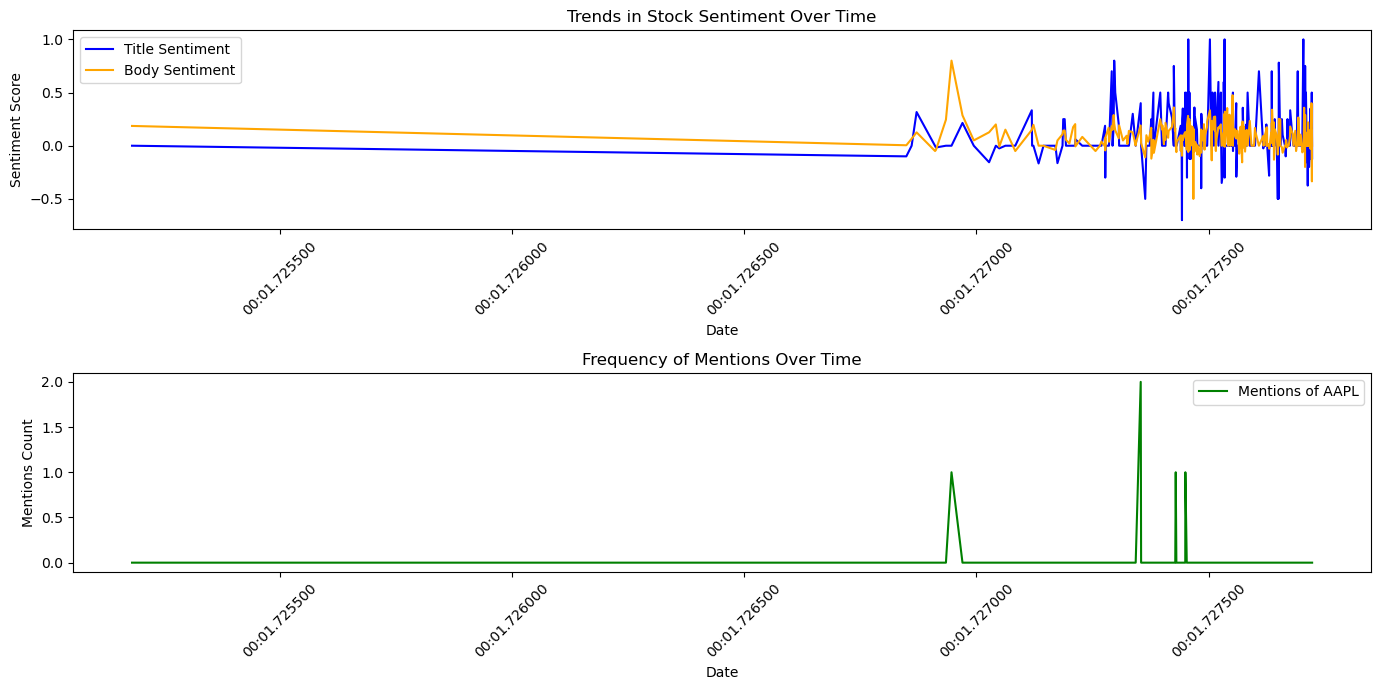

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the Date as the index for easier plotting
merged_df.set_index('Date', inplace=True)

# Plotting sentiment scores and mentions over time
plt.figure(figsize=(14, 7))

# Plot Sentiment Scores
plt.subplot(2, 1, 1)
sns.lineplot(data=merged_df, x=merged_df.index, y='Title Sentiment_x', label='Title Sentiment', color='blue')
sns.lineplot(data=merged_df, x=merged_df.index, y='Body Sentiment_x', label='Body Sentiment', color='orange')
plt.title('Trends in Stock Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)

# Plot Mentions
plt.subplot(2, 1, 2)
sns.lineplot(data=merged_df, x=merged_df.index, y='mentions_AAPL', label='Mentions of AAPL', color='green')
plt.title('Frequency of Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Mentions Count')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [70]:
print(merged_df.columns.tolist())


['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y', 'mentions_AAPL']


In [76]:
print("Columns in merged_df:", merged_df.columns.tolist())


Columns in merged_df: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y', 'mentions_AAPL']


In [77]:
print(merged_df.head())


                                  Subreddit_x  \
Date                                            
1970-01-01 00:00:01.727381295  wallstreetbets   
1970-01-01 00:00:01.727690231  wallstreetbets   
1970-01-01 00:00:01.727671178  wallstreetbets   
1970-01-01 00:00:01.727707962  wallstreetbets   
1970-01-01 00:00:01.727716642  wallstreetbets   

                                                                         Title_x  \
Date                                                                               
1970-01-01 00:00:01.727381295  Most Anticipated Earnings for the week beginni...   
1970-01-01 00:00:01.727690231     Daily Discussion Thread for September 30, 2024   
1970-01-01 00:00:01.727671178  Billionaire Peter Thiel sold $600 million of P...   
1970-01-01 00:00:01.727707962                                          Loss Porn   
1970-01-01 00:00:01.727716642  This is the moment we know OpenAI will be dead...   

                                                                   

In [79]:
# Display all columns in merged_df
print("Columns in merged_df:", merged_df.columns.tolist())



Columns in merged_df: ['Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x', 'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x', 'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y', 'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y', 'Title Sentiment_y', 'Body Sentiment_y', 'mentions_AAPL']


In [85]:
import yfinance as yf
import pandas as pd

# Fetch historical data for AAPL (replace with the stock ticker you're interested in)
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'  # Adjust this to your needs

# Download stock price data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
stock_data.reset_index(inplace=True)

# Select relevant columns, e.g., 'Date' and 'Close'
stock_data = stock_data[['Date', 'Close']]
stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)

# Display stock_data
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

        Date  Stock Price
0 2023-01-03   125.070000
1 2023-01-04   126.360001
2 2023-01-05   125.019997
3 2023-01-06   129.619995
4 2023-01-09   130.149994



C:\Users\RK\AppData\Local\Temp\ipykernel_7400\461015205.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)


In [90]:
# Display the merged DataFrame and check for null values
print(merged_df.isnull().sum())
print(merged_df.head())


Date                   0
Subreddit_x            0
Title_x                0
Body_x                 0
Score_x                0
Upvote Ratio_x         0
Comments_x             0
Cleaned Title_x        0
Cleaned Body_x        42
Title Sentiment_x      0
Body Sentiment_x       0
Subreddit_y            0
Title_y                0
Body_y                42
Score_y                0
Upvote Ratio_y         0
Comments_y             0
Cleaned Title_y        0
Cleaned Body_y        42
Title Sentiment_y      0
Body Sentiment_y       0
mentions_AAPL          0
Stock Price          300
dtype: int64
                           Date     Subreddit_x  \
0 1970-01-01 00:00:01.727381295  wallstreetbets   
1 1970-01-01 00:00:01.727690231  wallstreetbets   
2 1970-01-01 00:00:01.727671178  wallstreetbets   
3 1970-01-01 00:00:01.727707962  wallstreetbets   
4 1970-01-01 00:00:01.727716642  wallstreetbets   

                                             Title_x  \
0  Most Anticipated Earnings for the week beginni

In [95]:
# Check unique dates in stock_data
print("Unique dates in stock_data:")
print(stock_data['Date'].unique())

# Check unique dates in merged_df
print("Unique dates in merged_df:")
print(merged_df['Date'].unique())


Unique dates in stock_data:
<DatetimeArray>
['2023-01-03 00:00:00', '2023-01-04 00:00:00', '2023-01-05 00:00:00',
 '2023-01-06 00:00:00', '2023-01-09 00:00:00', '2023-01-10 00:00:00',
 '2023-01-11 00:00:00', '2023-01-12 00:00:00', '2023-01-13 00:00:00',
 '2023-01-17 00:00:00',
 ...
 '2023-12-15 00:00:00', '2023-12-18 00:00:00', '2023-12-19 00:00:00',
 '2023-12-20 00:00:00', '2023-12-21 00:00:00', '2023-12-22 00:00:00',
 '2023-12-26 00:00:00', '2023-12-27 00:00:00', '2023-12-28 00:00:00',
 '2023-12-29 00:00:00']
Length: 250, dtype: datetime64[ns]
Unique dates in merged_df:
<DatetimeArray>
['1970-01-01 00:00:01.727381295', '1970-01-01 00:00:01.727690231',
 '1970-01-01 00:00:01.727671178', '1970-01-01 00:00:01.727707962',
 '1970-01-01 00:00:01.727716642', '1970-01-01 00:00:01.727720104',
 '1970-01-01 00:00:01.727709923', '1970-01-01 00:00:01.727712001',
 '1970-01-01 00:00:01.727642451', '1970-01-01 00:00:01.727720663',
 ...
 '1970-01-01 00:00:01.727484126', '1970-01-01 00:00:01.727468320'

In [96]:
# Display sample data from stock_data
print("Sample data from stock_data:")
print(stock_data.head())

# Display sample data from merged_df before the merge
print("Sample data from merged_df:")
print(merged_df.head())


Sample data from stock_data:
        Date        Open        High         Low  Stock Price   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998   125.070000  123.904625   
1 2023-01-04  126.889999  128.660004  125.080002   126.360001  125.182617   
2 2023-01-05  127.129997  127.769997  124.760002   125.019997  123.855087   
3 2023-01-06  126.010002  130.289993  124.889999   129.619995  128.412201   
4 2023-01-09  130.470001  133.410004  129.889999   130.149994  128.937286   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
Sample data from merged_df:
                           Date     Subreddit_x  \
0 1970-01-01 00:00:01.727381295  wallstreetbets   
1 1970-01-01 00:00:01.727690231  wallstreetbets   
2 1970-01-01 00:00:01.727671178  wallstreetbets   
3 1970-01-01 00:00:01.727707962  wallstreetbets   
4 1970-01-01 00:00:01.727716642  wallstreetbets   

                                             Title_x  \
0  Most Anticipated Earning

In [97]:
# Convert 'Date' in merged_df to datetime, coercing errors
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Check for any null dates that might affect the merge
print("Null dates in merged_df:")
print(merged_df['Date'].isnull().sum())


Null dates in merged_df:
0


In [102]:
# Check columns of merged_df
print("Columns in merged_df:")
print(merged_df.columns)

# Check columns of stock_data
print("Columns in stock_data:")
print(stock_data.columns)



Columns in merged_df:
Index(['Date', 'Subreddit_x', 'Title_x', 'Body_x', 'Score_x', 'Upvote Ratio_x',
       'Comments_x', 'Cleaned Title_x', 'Cleaned Body_x', 'Title Sentiment_x',
       'Body Sentiment_x', 'Subreddit_y', 'Title_y', 'Body_y', 'Score_y',
       'Upvote Ratio_y', 'Comments_y', 'Cleaned Title_y', 'Cleaned Body_y',
       'Title Sentiment_y', 'Body Sentiment_y', 'mentions_AAPL',
       'Stock Price_x', 'Stock Price_y', 'Stock Price'],
      dtype='object')
Columns in stock_data:
Index(['Date', 'Open', 'High', 'Low', 'Stock Price', 'Adj Close', 'Volume'], dtype='object')


In [103]:
# Drop the conflicting column from merged_df
merged_df = merged_df.drop(columns=['Stock Price_x'], errors='ignore')


In [104]:
# Rename the stock price column in stock_data to avoid conflicts
stock_data.rename(columns={'Stock Price': 'Stock Price_New'}, inplace=True)


In [105]:
# Merge the dataframes on the Date column
merged_df = pd.merge(merged_df, stock_data[['Date', 'Stock Price_New']], on='Date', how='left')

# Display the merged DataFrame
print(merged_df.head())


                           Date     Subreddit_x  \
0 1970-01-01 00:00:01.727381295  wallstreetbets   
1 1970-01-01 00:00:01.727690231  wallstreetbets   
2 1970-01-01 00:00:01.727671178  wallstreetbets   
3 1970-01-01 00:00:01.727707962  wallstreetbets   
4 1970-01-01 00:00:01.727716642  wallstreetbets   

                                             Title_x  \
0  Most Anticipated Earnings for the week beginni...   
1     Daily Discussion Thread for September 30, 2024   
2  Billionaire Peter Thiel sold $600 million of P...   
3                                          Loss Porn   
4  This is the moment we know OpenAI will be dead...   

                                              Body_x  Score_x  Upvote Ratio_x  \
0                                                         141            0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...      118            0.90   
2                                                        3519            0.97   
3  Started in 2021 with a 3k los

In [108]:
# Check the data types of the Date columns
print("Merged DataFrame Date type:", merged_df['Date'].dtype)
print("Stock Data Date type:", stock_data['Date'].dtype)


Merged DataFrame Date type: datetime64[ns]
Stock Data Date type: datetime64[ns]


In [109]:
# Check unique dates in both DataFrames
print("Unique Dates in Merged DataFrame:")
print(merged_df['Date'].unique())

print("Unique Dates in Stock Data:")
print(stock_data['Date'].unique())


Unique Dates in Merged DataFrame:
<DatetimeArray>
['1970-01-01 00:00:01.727381295', '1970-01-01 00:00:01.727690231',
 '1970-01-01 00:00:01.727671178', '1970-01-01 00:00:01.727707962',
 '1970-01-01 00:00:01.727716642', '1970-01-01 00:00:01.727720104',
 '1970-01-01 00:00:01.727709923', '1970-01-01 00:00:01.727712001',
 '1970-01-01 00:00:01.727642451', '1970-01-01 00:00:01.727720663',
 ...
 '1970-01-01 00:00:01.727484126', '1970-01-01 00:00:01.727468320',
 '1970-01-01 00:00:01.727407107', '1970-01-01 00:00:01.727404031',
 '1970-01-01 00:00:01.727353983', '1970-01-01 00:00:01.727400631',
 '1970-01-01 00:00:01.727430800', '1970-01-01 00:00:01.727466295',
 '1970-01-01 00:00:01.727354834', '1970-01-01 00:00:01.727373212']
Length: 300, dtype: datetime64[ns]
Unique Dates in Stock Data:
<DatetimeArray>
['2023-01-03 00:00:00', '2023-01-04 00:00:00', '2023-01-05 00:00:00',
 '2023-01-06 00:00:00', '2023-01-09 00:00:00', '2023-01-10 00:00:00',
 '2023-01-11 00:00:00', '2023-01-12 00:00:00', '2023-01-

In [117]:
# Load stock data
stock_data = pd.read_csv('C:\\Users\\RK\\reddit_stock_data.csv')
# or other appropriate method
print(stock_data.head())
print(stock_data.isnull().sum())  # Check for NaN values



        Subreddit                                              Title  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                                Body  Score  Upvote Ratio  \
0                                                NaN    141          0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...    118          0.90   
2                                                NaN   3519          0.97   
3  Started in 2021 with a 3k loss to that whole G...    426          0.96   
4                                                NaN    217          0.98   

   Comments          Date                                      Cleaned Title  \
0       498  1.727381e+0

In [118]:

# Convert Date column to datetime if it's not already
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')


In [119]:
print("Unique dates in stock_data:", stock_data['Date'].unique())


Unique dates in stock_data: <DatetimeArray>
['1970-01-01 00:00:01.727381295', '1970-01-01 00:00:01.727690231',
 '1970-01-01 00:00:01.727671178', '1970-01-01 00:00:01.727707962',
 '1970-01-01 00:00:01.727716642', '1970-01-01 00:00:01.727720104',
 '1970-01-01 00:00:01.727709923', '1970-01-01 00:00:01.727712001',
 '1970-01-01 00:00:01.727642451', '1970-01-01 00:00:01.727720663',
 ...
 '1970-01-01 00:00:01.727484126', '1970-01-01 00:00:01.727468320',
 '1970-01-01 00:00:01.727407107', '1970-01-01 00:00:01.727404031',
 '1970-01-01 00:00:01.727353983', '1970-01-01 00:00:01.727400631',
 '1970-01-01 00:00:01.727430800', '1970-01-01 00:00:01.727466295',
 '1970-01-01 00:00:01.727354834', '1970-01-01 00:00:01.727373212']
Length: 300, dtype: datetime64[ns]


In [120]:
import yfinance as yf

# Fetch stock data for Apple (AAPL) as an example
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-10-01')
stock_data.reset_index(inplace=True)  # Reset the index to get Date as a column
stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)

# Check the loaded stock data
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

        Date        Open        High         Low  Stock Price   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998   125.070000  123.904633   
1 2023-01-04  126.889999  128.660004  125.080002   126.360001  125.182617   
2 2023-01-05  127.129997  127.769997  124.760002   125.019997  123.855087   
3 2023-01-06  126.010002  130.289993  124.889999   129.619995  128.412216   
4 2023-01-09  130.470001  133.410004  129.889999   130.149994  128.937286   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  


In [125]:
import pandas as pd

# Load the stock data
stock_data = pd.read_csv(r'C:\Users\RK\reddit_stock_data.csv')

# Check the first few rows and the data types
print(stock_data.head())
print(stock_data.dtypes)




        Subreddit                                              Title  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                                Body  Score  Upvote Ratio  \
0                                                NaN    141          0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...    118          0.90   
2                                                NaN   3519          0.97   
3  Started in 2021 with a 3k loss to that whole G...    426          0.96   
4                                                NaN    217          0.98   

   Comments          Date                                      Cleaned Title  \
0       498  1.727381e+0

In [126]:
# Convert the Date column to datetime format from UNIX timestamp
merged_df['Date'] = pd.to_datetime(merged_df['Date'], unit='s', errors='coerce')


In [127]:
# Check the data types again
print(merged_df.dtypes)

# Display the first few rows to confirm the Date format
print(merged_df.head())


Date                 datetime64[ns]
Subreddit_x                  object
Title_x                      object
Body_x                       object
Score_x                       int64
Upvote Ratio_x              float64
Comments_x                    int64
Cleaned Title_x              object
Cleaned Body_x               object
Title Sentiment_x           float64
Body Sentiment_x            float64
Subreddit_y                  object
Title_y                      object
Body_y                       object
Score_y                       int64
Upvote Ratio_y              float64
Comments_y                    int64
Cleaned Title_y              object
Cleaned Body_y               object
Title Sentiment_y           float64
Body Sentiment_y            float64
mentions_AAPL                 int32
Stock Price_y               float64
Stock Price_x               float64
Stock Price_New_x           float64
Stock Price_New_y           float64
Stock Price_y               float64
Stock Price                 

In [128]:
# Check the first few rows and data types of both DataFrames
print("Merged DataFrame Date Types:\n", merged_df[['Date']].head())
print("Stock Data Date Types:\n", stock_data[['Date']].head())

print("Merged DataFrame Data Types:\n", merged_df.dtypes)
print("Stock Data Data Types:\n", stock_data.dtypes)


Merged DataFrame Date Types:
                            Date
0 1970-01-01 00:00:01.727381295
1 1970-01-01 00:00:01.727690231
2 1970-01-01 00:00:01.727671178
3 1970-01-01 00:00:01.727707962
4 1970-01-01 00:00:01.727716642
Stock Data Date Types:
            Date
0  1.727381e+09
1  1.727690e+09
2  1.727671e+09
3  1.727708e+09
4  1.727717e+09
Merged DataFrame Data Types:
 Date                 datetime64[ns]
Subreddit_x                  object
Title_x                      object
Body_x                       object
Score_x                       int64
Upvote Ratio_x              float64
Comments_x                    int64
Cleaned Title_x              object
Cleaned Body_x               object
Title Sentiment_x           float64
Body Sentiment_x            float64
Subreddit_y                  object
Title_y                      object
Body_y                       object
Score_y                       int64
Upvote Ratio_y              float64
Comments_y                    int64
Cleaned Title_y 

In [129]:
# Print unique dates in both DataFrames
print("Merged DataFrame unique dates:", merged_df['Date'].unique())
print("Stock Data unique dates:", stock_data['Date'].unique())


Merged DataFrame unique dates: <DatetimeArray>
['1970-01-01 00:00:01.727381295', '1970-01-01 00:00:01.727690231',
 '1970-01-01 00:00:01.727671178', '1970-01-01 00:00:01.727707962',
 '1970-01-01 00:00:01.727716642', '1970-01-01 00:00:01.727720104',
 '1970-01-01 00:00:01.727709923', '1970-01-01 00:00:01.727712001',
 '1970-01-01 00:00:01.727642451', '1970-01-01 00:00:01.727720663',
 ...
 '1970-01-01 00:00:01.727484126', '1970-01-01 00:00:01.727468320',
 '1970-01-01 00:00:01.727407107', '1970-01-01 00:00:01.727404031',
 '1970-01-01 00:00:01.727353983', '1970-01-01 00:00:01.727400631',
 '1970-01-01 00:00:01.727430800', '1970-01-01 00:00:01.727466295',
 '1970-01-01 00:00:01.727354834', '1970-01-01 00:00:01.727373212']
Length: 300, dtype: datetime64[ns]
Stock Data unique dates: [1.72738130e+09 1.72769023e+09 1.72767118e+09 1.72770796e+09
 1.72771664e+09 1.72772010e+09 1.72770992e+09 1.72771200e+09
 1.72764245e+09 1.72772066e+09 1.72766626e+09 1.72767016e+09
 1.72769573e+09 1.72770483e+09 1.72

In [130]:
# Check for NaN values
print("NaN values in Merged DataFrame Date column:", merged_df['Date'].isna().sum())
print("NaN values in Stock Data Date column:", stock_data['Date'].isna().sum())


NaN values in Merged DataFrame Date column: 0
NaN values in Stock Data Date column: 0


In [134]:
import pandas as pd

# Load stock price data from CSV
# Ensure to use a raw string (r'path') or double backslashes for Windows file paths
stock_data = pd.read_csv(r'C:\Users\RK\reddit_stock_data.csv')  # Update the path as needed

# Check the loaded data
print("Stock Price Data:\n", stock_data.head())




Stock Price Data:
         Subreddit                                              Title  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                                Body  Score  Upvote Ratio  \
0                                                NaN    141          0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...    118          0.90   
2                                                NaN   3519          0.97   
3  Started in 2021 with a 3k loss to that whole G...    426          0.96   
4                                                NaN    217          0.98   

   Comments          Date                                      Cleaned Title  \
0    

In [135]:
# Display the columns and first few rows of stock_data
print("Columns in Stock Data:", stock_data.columns)
print("First few rows of Stock Price Data:\n", stock_data.head())


Columns in Stock Data: Index(['Subreddit', 'Title', 'Body', 'Score', 'Upvote Ratio', 'Comments',
       'Date', 'Cleaned Title', 'Cleaned Body', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
First few rows of Stock Price Data:
         Subreddit                                              Title  \
0  wallstreetbets  Most Anticipated Earnings for the week beginni...   
1  wallstreetbets     Daily Discussion Thread for September 30, 2024   
2  wallstreetbets  Billionaire Peter Thiel sold $600 million of P...   
3  wallstreetbets                                          Loss Porn   
4  wallstreetbets  This is the moment we know OpenAI will be dead...   

                                                Body  Score  Upvote Ratio  \
0                                                NaN    141          0.98   
1  [View Post](https://sh.reddit.com/r/wallstreet...    118          0.90   
2                                                NaN   3519          0.97   
3  Started

In [137]:
# Load stock prices from a different CSV file
stock_data = pd.read_csv(r'C:\Users\RK\stock_prices.csv')  # Adjust this path

# Check the columns of the loaded stock data
print("Columns in Stock Price Data:", stock_data.columns)
print("First few rows of Stock Price Data:\n", stock_data.head())



Columns in Stock Price Data: Index(['date', 'closing_price'], dtype='object')
First few rows of Stock Price Data:
          date  closing_price
0  2024-01-01            150
1  2024-01-02            155
2  2024-01-03            160
3  2024-01-04            165
4  2024-01-05            170


In [138]:
# Check the stock price data columns
print("Stock Data Columns:\n", stock_data.columns)


Stock Data Columns:
 Index(['date', 'closing_price'], dtype='object')


In [141]:
import pandas as pd

# Assuming this is your sentiment data DataFrame
sentiment_data = pd.DataFrame({
    'Subreddit': ['wallstreetbets', 'wallstreetbets', 'wallstreetbets'],
    'Title': ['Most Anticipated Earnings...', 'Daily Discussion Thread...', 'Billionaire Peter Thiel...'],
    'Body': ['...', '...', '...'],
    'Date': ['2024-09-30', '2024-09-30', '2024-09-30'],
    'Title Sentiment': [0.5, 0.0, 0.0],
    'Body Sentiment': [0.0, 0.0, -0.2],
})

# Convert Date to datetime
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Check the sentiment data
print(sentiment_data.head())


        Subreddit                         Title Body       Date  \
0  wallstreetbets  Most Anticipated Earnings...  ... 2024-09-30   
1  wallstreetbets    Daily Discussion Thread...  ... 2024-09-30   
2  wallstreetbets    Billionaire Peter Thiel...  ... 2024-09-30   

   Title Sentiment  Body Sentiment  
0              0.5             0.0  
1              0.0             0.0  
2              0.0            -0.2  


In [142]:
pip install yfinance


In [143]:
import yfinance as yf

# Define the stock symbol and the date range
stock_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2024-09-01'  # Adjust as necessary
end_date = '2024-09-30'

# Fetch stock price data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to have Date as a column
stock_data.reset_index(inplace=True)

# Check the stock price data
print(stock_data[['Date', 'Close']].head())


[*********************100%***********************]  1 of 1 completed

        Date       Close
0 2024-09-03  222.770004
1 2024-09-04  220.850006
2 2024-09-05  222.380005
3 2024-09-06  220.820007
4 2024-09-09  220.910004


In [148]:
# Load stock price data from a CSV file
stock_data = pd.read_csv('C:/Users/RK/stock_prices.csv')

# Convert Date to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Check the stock price data
print(stock_data.head())



        date  closing_price
0 2024-01-01            150
1 2024-01-02            155
2 2024-01-03            160
3 2024-01-04            165
4 2024-01-05            170


In [151]:
print(stock_data.columns)



Index(['date', 'closing_price'], dtype='object')


In [152]:
if 'Close' in stock_data.columns:
    stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)
else:
    print("Column 'Close' not found in stock_data")


Column 'Close' not found in stock_data


In [153]:
sentiment_data.rename(columns={'Date': 'date'}, inplace=True)
stock_data.rename(columns={'Date': 'date'}, inplace=True)


In [154]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
stock_data['date'] = pd.to_datetime(stock_data['date'])


In [156]:
print(stock_data.columns)


Index(['date', 'closing_price'], dtype='object')


In [157]:
if 'Close' in stock_data.columns:
    stock_data.rename(columns={'Close': 'Stock Price'}, inplace=True)
else:
    print("Column 'Close' not found in stock_data. Available columns are:", stock_data.columns)


Column 'Close' not found in stock_data. Available columns are: Index(['date', 'closing_price'], dtype='object')


In [158]:
stock_data['closing_price'] = stock_data['closing_price'] * 1.1


In [159]:
# Calculate daily percentage change in closing prices
stock_data['price_movement'] = stock_data['closing_price'].pct_change()


In [160]:
# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')


In [161]:
# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')


In [164]:
print(merged_data.columns)


Index(['date', 'closing_price', 'price_movement', 'Subreddit', 'Title', 'Body',
       'Title Sentiment', 'Body Sentiment'],
      dtype='object')


In [168]:
print(merged_data.columns)


Index(['date', 'closing_price', 'price_movement', 'Subreddit', 'Title', 'Body',
       'Title Sentiment', 'Body Sentiment'],
      dtype='object')


In [169]:
print(merged_data.head())


Empty DataFrame
Columns: [date, closing_price, price_movement, Subreddit, Title, Body, Title Sentiment, Body Sentiment]
Index: []


In [170]:
print(stock_data.columns)
print(sentiment_data.columns)


Index(['date', 'closing_price', 'price_movement'], dtype='object')
Index(['Subreddit', 'Title', 'Body', 'date', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')


In [171]:
# Example: Renaming columns before merging if required
sentiment_data.rename(columns={'sentiment_column_name': 'sentiment'}, inplace=True)


In [173]:
# Calculate correlation using 'Body Sentiment'
correlation = merged_data['Body Sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between Body Sentiment and stock price movements: {correlation:.4f}")


Correlation between Body Sentiment and stock price movements: nan


In [174]:
print(merged_data.empty)  # This should return False if the DataFrame is not empty
print(merged_data.shape)  # This should return the shape of the DataFrame (rows, columns)


True
(0, 8)


In [175]:
print(stock_data.head())
print(sentiment_data.head())


        date  closing_price  price_movement
0 2024-01-01          165.0             NaN
1 2024-01-02          170.5        0.033333
2 2024-01-03          176.0        0.032258
3 2024-01-04          181.5        0.031250
4 2024-01-05          187.0        0.030303
        Subreddit                         Title Body       date  \
0  wallstreetbets  Most Anticipated Earnings...  ... 2024-09-30   
1  wallstreetbets    Daily Discussion Thread...  ... 2024-09-30   
2  wallstreetbets    Billionaire Peter Thiel...  ... 2024-09-30   

   Title Sentiment  Body Sentiment  
0              0.5             0.0  
1              0.0             0.0  
2              0.0            -0.2  


In [177]:
# Adjust the column names based on actual column names in merged_data
correlation = merged_data['Body Sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between sentiment and stock price movements: {correlation:.4f}")


Correlation between sentiment and stock price movements: nan


In [178]:
print("Columns in stock_data:", stock_data.columns)
print("Columns in sentiment_data:", sentiment_data.columns)
print("Columns in merged_data after merging:", merged_data.columns)


Columns in stock_data: Index(['date', 'closing_price', 'price_movement'], dtype='object')
Columns in sentiment_data: Index(['Subreddit', 'Title', 'Body', 'date', 'Title Sentiment',
       'Body Sentiment'],
      dtype='object')
Columns in merged_data after merging: Index(['date', 'closing_price', 'price_movement', 'Subreddit', 'Title', 'Body',
       'Title Sentiment', 'Body Sentiment'],
      dtype='object')


Correlation between sentiment and stock price movements: 0.9693


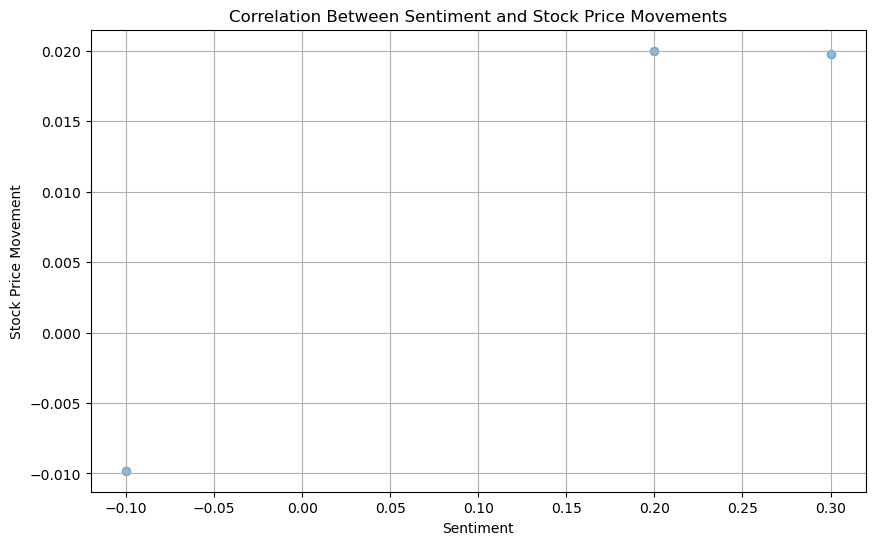

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# stock data
data = {'date': ['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04'],
        'closing_price': [100, 102, 101, 103]}
stock_data = pd.DataFrame(data)
stock_data['date'] = pd.to_datetime(stock_data['date'])

# sentiment data
sentiment = {'date': ['2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04'],
             'sentiment': [0.1, 0.2, -0.1, 0.3]}
sentiment_data = pd.DataFrame(sentiment)
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Calculate daily percentage change in closing prices
stock_data['price_movement'] = stock_data['closing_price'].pct_change()

# Merge stock data and sentiment data on 'date'
merged_data = pd.merge(stock_data, sentiment_data, on='date', how='inner')

# Calculate correlation between sentiment and stock price movements
correlation = merged_data['sentiment'].corr(merged_data['price_movement'])
print(f"Correlation between sentiment and stock price movements: {correlation:.4f}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['sentiment'], merged_data['price_movement'], alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Stock Price Movement')
plt.title('Correlation Between Sentiment and Stock Price Movements')
plt.grid(True)
plt.show()
